In [236]:
import pandas as pd
neighdf = pd.read_csv('Neighbourhood_Crime_Rates_(Boundary_File)_.csv')
neighdf.set_index('Neighbourhood', inplace = True)
neighdf.head(10)

,OBJECTID,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,...,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Yonge-St.Clair,1,97,12528,20,29,39,27,34,37,31.0,...,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582
York University Heights,2,27,27593,271,296,361,344,357,370,333.2,...,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326
Lansing-Westgate,3,38,16164,44,80,68,85,75,72,70.7,...,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625
Yorkdale-Glen Park,4,31,14804,106,136,174,161,175,209,160.2,...,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920
Stonegate-Queensway,5,16,25051,88,71,76,95,87,82,83.2,...,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878
Tam O'Shanter-Sullivan,6,118,27446,106,90,98,124,133,107,109.7,...,6,9,8,3,3,5.5,0.00,10.9,5.422345e+06,10750.468125
The Beaches,7,63,21567,83,108,86,111,94,81,93.8,...,5,3,7,5,9,6.2,0.80,41.7,3.595829e+06,11275.180743
Thistletown-Beaumond Heights,8,3,10360,56,52,39,51,50,74,53.7,...,3,1,4,2,3,2.3,0.50,29.0,3.339481e+06,10828.444477
Thorncliffe Park,9,55,21108,86,105,87,99,93,115,97.5,...,6,11,9,3,5,7.2,0.67,23.7,3.126554e+06,7502.709430


In [237]:
df3 = [col for col in neighdf.columns if 'AVG' in col]
neighdf2 = neighdf.filter(regex = 'AVG')
neighdf2.head(15)

,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
Neighbourhood,,,,,,
Yonge-St.Clair,31.0,4.3,23.3,0.0,5.7,4.3
York University Heights,333.2,106.3,113.2,0.8,75.8,36.3
Lansing-Westgate,70.7,23.7,38.8,1.7,14.7,7.0
Yorkdale-Glen Park,160.2,55.5,63.3,1.2,31.5,22.5
Stonegate-Queensway,83.2,28.7,52.8,0.0,20.7,6.0
Tam O'Shanter-Sullivan,109.7,23.0,62.7,0.7,27.7,5.5
The Beaches,93.8,16.3,49.3,0.0,20.3,6.2
Thistletown-Beaumond Heights,53.7,25.3,19.0,0.3,15.0,2.3
Thorncliffe Park,97.5,9.3,25.5,1.5,11.0,7.2


count    140.000000
mean     132.646429
std      128.977375
min       18.500000
25%       59.425000
50%       96.500000
75%      160.200000
max      851.800000
Name: Assault_AVG, dtype: float64

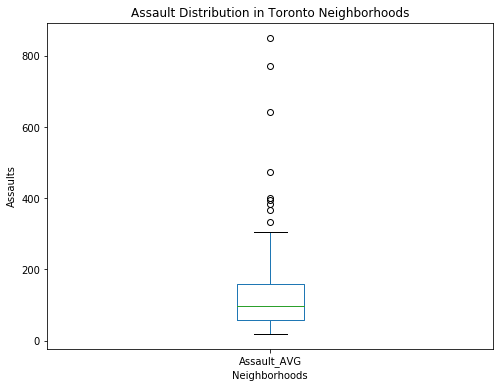

In [238]:
import matplotlib as mpl
import matplotlib.pyplot as plt
assdf = neighdf2.loc[:,'Assault_AVG']
assdf.plot(kind = 'box',figsize = (8,6))
plt.title('Assault Distribution in Toronto Neighborhoods')
plt.ylabel('Assaults')
plt.xlabel('Neighborhoods')
assdf.describe()

As we can see, the assault distribution in Toronto is fairly low (an average of 96.5) except in certain neighborhoods, these neighborhoods with assaults higher than the 75th percentile (160.20) are shown below

In [89]:
highassdf = assdf[assdf>=160.2]
highassdf.head()

Neighbourhood
York University Heights       333.2
Yorkdale-Glen Park            160.2
Islington-City Centre West    223.0
Scarborough Village           168.5
South Parkdale                226.5
Name: Assault_AVG, dtype: float64

In [90]:
highassaultlist = list(highassdf.index)

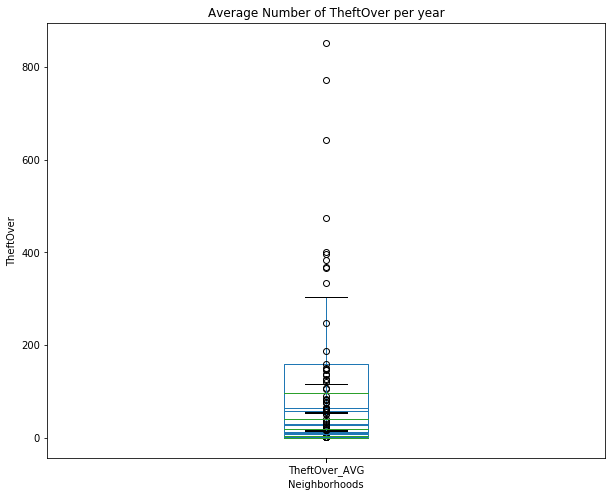

In [91]:
highlist = list()
fig, axes = plt.subplots()
for i in neighdf2.columns:
    new_df = neighdf2.loc[:,i]
    new_df.plot(kind = 'box', figsize = (10,8))
    d = i.split('_')
    c = 'Average Number of {} per year'.format(d[0])
    plt.title(c)
    plt.xlabel('Neighborhoods')
    plt.ylabel(d[0])
    perc = new_df.quantile(.75)
    highdf = new_df[new_df >= perc]
    s = list(highdf.index)
    highlist.append(s)

In [92]:
completelyhighgroup = list(set(highlist[0]) & set(highlist[1]) & set(highlist[2]) & set(highlist[3]) & set(highlist[4]) & set(highlist[5]))
completelyhighgroup

['York University Heights',
 'Wexford/Maryvale',
 'Dovercourt-Wallace Emerson-Junction',
 'Waterfront Communities-The Island',
 'Rouge',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Woburn',
 'West Humber-Clairville',
 'Islington-City Centre West',
 'Bay Street Corridor',
 'Downsview-Roding-CFB']

The list above shows the neighborhoods where all five categories (Robberies, Assaults, Auto-Theft, Breaking and Entering, Homicide, and Theft Over) were above the 75th percentile in relation to other Toronto Neighborhoods. These neighborhoods should be avoided.

count    140.000000
mean      27.835000
std       35.047468
min        2.700000
25%       13.275000
50%       18.800000
75%       30.975000
max      366.700000
Name: AutoTheft_AVG, dtype: float64

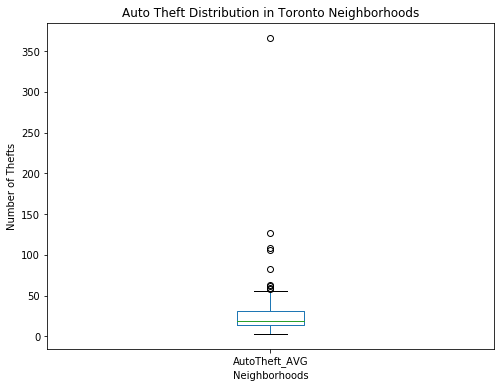

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
assdf = neighdf2.loc[:,'AutoTheft_AVG']
assdf.plot(kind = 'box',figsize = (8,6))
plt.title('Auto Theft Distribution in Toronto Neighborhoods')
plt.ylabel('Number of Thefts')
plt.xlabel('Neighborhoods')
assdf.describe()

count    140.000000
mean      51.548571
std       36.760413
min       10.500000
25%       28.000000
50%       40.750000
75%       64.450000
max      247.300000
Name: BreakandEnter_AVG, dtype: float64

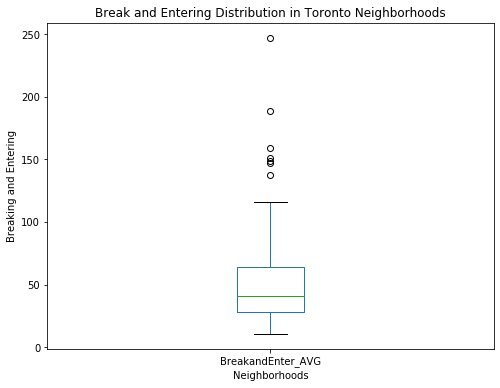

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
assdf = neighdf2.loc[:,'BreakandEnter_AVG']
assdf.plot(kind = 'box',figsize = (8,6))
plt.title('Break and Entering Distribution in Toronto Neighborhoods')
plt.ylabel('Breaking and Entering')
plt.xlabel('Neighborhoods')
assdf.describe()

count    140.000000
mean       0.513571
std        0.517911
min        0.000000
25%        0.200000
50%        0.300000
75%        0.725000
max        2.500000
Name: Homicide_AVG, dtype: float64

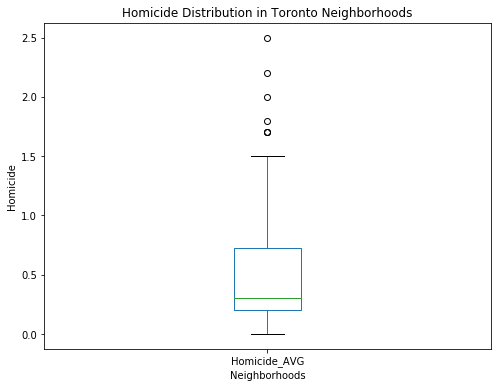

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
assdf = neighdf2.loc[:,'Homicide_AVG']
assdf.plot(kind = 'box',figsize = (8,6))
plt.title('Homicide Distribution in Toronto Neighborhoods')
plt.ylabel('Homicide')
plt.xlabel('Neighborhoods')
assdf.describe()

count    140.000000
mean      25.647143
std       23.220601
min        3.300000
25%       11.675000
50%       20.100000
75%       30.400000
max      135.700000
Name: Robbery_AVG, dtype: float64

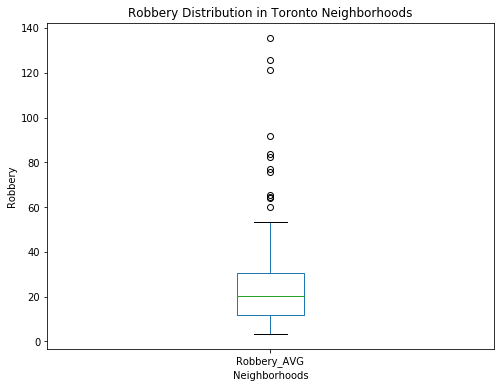

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
assdf = neighdf2.loc[:,'Robbery_AVG']
assdf.plot(kind = 'box',figsize = (8,6))
plt.title('Robbery Distribution in Toronto Neighborhoods')
plt.ylabel('Robbery')
plt.xlabel('Neighborhoods')
assdf.describe()

count    140.000000
mean       8.082857
std        9.427947
min        1.200000
25%        3.500000
50%        5.200000
75%        8.350000
max       56.200000
Name: TheftOver_AVG, dtype: float64

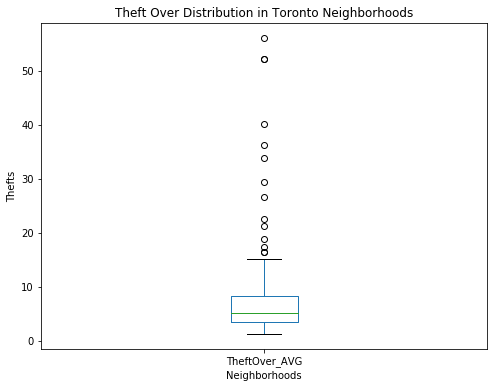

In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
assdf = neighdf2.loc[:,'TheftOver_AVG']
assdf.plot(kind = 'box',figsize = (8,6))
plt.title('Theft Over Distribution in Toronto Neighborhoods')
plt.ylabel('Thefts')
plt.xlabel('Neighborhoods')
assdf.describe()

In [239]:
from sklearn.cluster import KMeans
num_clus = 3
kmeans = KMeans(n_clusters = num_clus, random_state = 0).fit(neighdf2)
neighdf2.insert(0,'Cluster Labels', kmeans.labels_)
neighdf2.head(25)

,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
Neighbourhood,,,,,,,
Yonge-St.Clair,1,31.0,4.3,23.3,0.0,5.7,4.3
York University Heights,0,333.2,106.3,113.2,0.8,75.8,36.3
Lansing-Westgate,1,70.7,23.7,38.8,1.7,14.7,7.0
Yorkdale-Glen Park,1,160.2,55.5,63.3,1.2,31.5,22.5
Stonegate-Queensway,1,83.2,28.7,52.8,0.0,20.7,6.0
Tam O'Shanter-Sullivan,1,109.7,23.0,62.7,0.7,27.7,5.5
The Beaches,1,93.8,16.3,49.3,0.0,20.3,6.2
Thistletown-Beaumond Heights,1,53.7,25.3,19.0,0.3,15.0,2.3
Thorncliffe Park,1,97.5,9.3,25.5,1.5,11.0,7.2


In [165]:
neighdf2.tail()

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG
135,Milliken,1,83.8,58.5,108.3,0.2,32.7,16.5
136,Pleasant View,1,46.0,13.5,19.8,0.2,11.8,3.8
137,Wychwood,1,70.2,13.2,34.0,0.3,13.8,2.3
138,Leaside-Bennington,1,32.8,18.2,33.3,0.2,7.5,5.2
139,Briar Hill-Belgravia,1,73.7,18.2,36.7,0.2,21.5,5.0


In this cluster, we see that the places with the highest rates of crime are in cluster 2 with the amount of crime decreasing with each cluster.

In [240]:
import geopandas as gp
tor_neigh = gp.read_file('https://raw.githubusercontent.com/jasonicarter/toronto-geojson/master/toronto_crs84.geojson')
tor_neigh

,AREA_S_CD,AREA_NAME,geometry
0,097,Yonge-St.Clair (97),"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
1,027,York University Heights (27),"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
2,038,Lansing-Westgate (38),"POLYGON ((-79.43998 43.76156, -79.44004 43.761..."
3,031,Yorkdale-Glen Park (31),"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."
4,016,Stonegate-Queensway (16),"POLYGON ((-79.49262 43.64744, -79.49277 43.647..."
...,...,...,...
135,130,Milliken (130),"POLYGON ((-79.24308 43.81297, -79.24433 43.812..."
136,046,Pleasant View (46),"POLYGON ((-79.34346 43.79517, -79.34359 43.795..."
137,094,Wychwood (94),"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
138,056,Leaside-Bennington (56),"POLYGON ((-79.37749 43.71309, -79.37762 43.713..."


In [241]:
import folium

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [171]:
address = 'Toronto, Ontario'
g = Nominatim(user_agent = 'foursquare_agent')
loca = g.geocode(address)
tor_lat = loca.latitude
tor_long = loca.longitude
map_tor = folium.Map(location = [tor_lat,tor_long],zoom_start = 11)
map_tor

In [242]:
ij = 0

for i in tor_neigh['AREA_NAME']:
    tor_neigh.loc[ij,'AREA_NAME'] = i[:-5]
    if ij <= 139:
        ij = ij+1
tor_neigh.head()


,AREA_S_CD,AREA_NAME,geometry
0,097,Yonge-St.Clair,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
1,027,York University Heights,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
2,038,Lansing-Westgate,"POLYGON ((-79.43998 43.76156, -79.44004 43.761..."
3,031,Yorkdale-Glen Park,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."
4,016,Stonegate-Queensway,"POLYGON ((-79.49262 43.64744, -79.49277 43.647..."


In [243]:
neighdf3 = neighdf2.reset_index()
d = tor_neigh['AREA_NAME'] == neighdf3['Neighbourhood']
df34 = pd.DataFrame({'Same Column':d})
df34.head(5)

,Same Column
0,True
1,True
2,True
3,True
4,True


In [244]:
neighdf2.reset_index(inplace = True)
neighdf2 = pd.concat([neighdf2,df34],axis = 1)
neighdf2.head(15)

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Same Column
0,Yonge-St.Clair,1,31.0,4.3,23.3,0.0,5.7,4.3,True
1,York University Heights,0,333.2,106.3,113.2,0.8,75.8,36.3,True
2,Lansing-Westgate,1,70.7,23.7,38.8,1.7,14.7,7.0,True
3,Yorkdale-Glen Park,1,160.2,55.5,63.3,1.2,31.5,22.5,True
4,Stonegate-Queensway,1,83.2,28.7,52.8,0.0,20.7,6.0,True
5,Tam O'Shanter-Sullivan,1,109.7,23.0,62.7,0.7,27.7,5.5,False
6,The Beaches,1,93.8,16.3,49.3,0.0,20.3,6.2,True
7,Thistletown-Beaumond Heights,1,53.7,25.3,19.0,0.3,15.0,2.3,False
8,Thorncliffe Park,1,97.5,9.3,25.5,1.5,11.0,7.2,True
9,Danforth East York,1,65.8,9.3,27.2,0.0,5.8,2.8,True


In [245]:
tor_neigh = pd.concat([tor_neigh,df34],axis = 1)
tor_neigh.head(10)

,AREA_S_CD,AREA_NAME,geometry,Same Column
0,097,Yonge-St.Clair,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",True
1,027,York University Heights,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",True
2,038,Lansing-Westgate,"POLYGON ((-79.43998 43.76156, -79.44004 43.761...",True
3,031,Yorkdale-Glen Park,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",True
4,016,Stonegate-Queensway,"POLYGON ((-79.49262 43.64744, -79.49277 43.647...",True
5,118,Tam O'Shanter-Sullivan,"POLYGON ((-79.31979 43.76836, -79.31988 43.768...",False
6,063,The Beaches,"POLYGON ((-79.31485 43.66674, -79.31356 43.667...",True
7,003,Thistletown-Beaumond Height,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",False
8,055,Thorncliffe Park,"POLYGON ((-79.33542 43.70320, -79.33573 43.703...",True
9,059,Danforth East York,"POLYGON ((-79.34627 43.68272, -79.34645 43.683...",True


In [249]:
tor_neigh = tor_neigh[tor_neigh['Same Column'] == True]
neighdf2 = neighdf2[neighdf2['Same Column'] == True]
neighdf2.head()

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Same Column
0,Yonge-St.Clair,1,31.0,4.3,23.3,0.0,5.7,4.3,True
1,York University Heights,0,333.2,106.3,113.2,0.8,75.8,36.3,True
2,Lansing-Westgate,1,70.7,23.7,38.8,1.7,14.7,7.0,True
3,Yorkdale-Glen Park,1,160.2,55.5,63.3,1.2,31.5,22.5,True
4,Stonegate-Queensway,1,83.2,28.7,52.8,0.0,20.7,6.0,True


In [253]:
tor_neigh.drop(['Same Column'],axis = 1,inplace = True)


KeyError: "['Same Column'] not found in axis"

In [254]:
tor_neigh.to_file('tor_neigh.json',driver = 'GeoJSON')

In [255]:
import json
with open('tor_neigh.json') as f:
    tor_neigh = json.load(f)
neighdf2.head(15)

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Same Column
0,Yonge-St.Clair,1,31.0,4.3,23.3,0.0,5.7,4.3,True
1,York University Heights,0,333.2,106.3,113.2,0.8,75.8,36.3,True
2,Lansing-Westgate,1,70.7,23.7,38.8,1.7,14.7,7.0,True
3,Yorkdale-Glen Park,1,160.2,55.5,63.3,1.2,31.5,22.5,True
4,Stonegate-Queensway,1,83.2,28.7,52.8,0.0,20.7,6.0,True
6,The Beaches,1,93.8,16.3,49.3,0.0,20.3,6.2,True
8,Thorncliffe Park,1,97.5,9.3,25.5,1.5,11.0,7.2,True
9,Danforth East York,1,65.8,9.3,27.2,0.0,5.8,2.8,True
11,Islington-City Centre West,0,223.0,126.5,116.3,0.8,41.8,40.2,True
12,Danforth,1,72.3,6.2,37.3,0.8,20.7,3.7,True


In [256]:

address = 'Toronto, Ontario'
g = Nominatim(user_agent = 'foursquare_agent')
loca = g.geocode(address)
tor_lat = loca.latitude
tor_long = loca.longitude
map_tor = folium.Map(location = [tor_lat,tor_long],zoom_start = 11)

map_tor.choropleth(
    geo_data=tor_neigh,
    data=neighdf2,
    columns=['Neighbourhood','Cluster Labels'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Cluster Label',
    reset=False
)
neighdf2.head()

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Same Column
0,Yonge-St.Clair,1,31.0,4.3,23.3,0.0,5.7,4.3,True
1,York University Heights,0,333.2,106.3,113.2,0.8,75.8,36.3,True
2,Lansing-Westgate,1,70.7,23.7,38.8,1.7,14.7,7.0,True
3,Yorkdale-Glen Park,1,160.2,55.5,63.3,1.2,31.5,22.5,True
4,Stonegate-Queensway,1,83.2,28.7,52.8,0.0,20.7,6.0,True


In [257]:
map_tor

In [258]:
dfclus1 = neighdf2[neighdf2['Cluster Labels'] == 0]
dfclus1

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Same Column
1,York University Heights,0,333.2,106.3,113.2,0.8,75.8,36.3,True
11,Islington-City Centre West,0,223.0,126.5,116.3,0.8,41.8,40.2,True
15,South Parkdale,0,226.5,18.7,65.3,0.3,33.0,10.0,True
16,South Riverdale,0,244.3,30.8,108.8,1.8,49.0,21.3,True
34,Glenfield-Jane Heights,0,304.8,59.2,36.7,0.8,53.2,8.8,True
51,Kensington-Chinatown,0,368.2,27.5,150.8,1.5,64.0,26.7,True
56,Annex,0,246.3,22.0,147.5,0.5,40.8,29.5,True
65,Dovercourt-Wallace Emerson-Junction,0,240.8,32.0,106.5,1.7,51.0,9.5,True
67,Niagara,0,263.7,24.7,85.5,0.8,20.5,16.5,True
91,Downsview-Roding-CFB,0,395.8,107.8,78.8,1.3,64.7,15.2,True


In [259]:
dfclus1 = neighdf2[neighdf2['Cluster Labels'] == 1]
dfclus1

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Same Column
0,Yonge-St.Clair,1,31.0,4.3,23.3,0.0,5.7,4.3,True
2,Lansing-Westgate,1,70.7,23.7,38.8,1.7,14.7,7.0,True
3,Yorkdale-Glen Park,1,160.2,55.5,63.3,1.2,31.5,22.5,True
4,Stonegate-Queensway,1,83.2,28.7,52.8,0.0,20.7,6.0,True
6,The Beaches,1,93.8,16.3,49.3,0.0,20.3,6.2,True
...,...,...,...,...,...,...,...,...,...
133,Woodbine Corridor,1,86.0,9.2,32.5,0.5,14.5,4.0,True
134,Newtonbrook East,1,66.5,11.7,49.8,0.3,9.0,5.2,True
136,Pleasant View,1,46.0,13.5,19.8,0.2,11.8,3.8,True
137,Wychwood,1,70.2,13.2,34.0,0.3,13.8,2.3,True


In [260]:
dfclus1 = neighdf2[neighdf2['Cluster Labels'] == 2]
dfclus1

,Neighbourhood,Cluster Labels,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Same Column
22,Church-Yonge Corridor,2,642.8,37.8,188.5,2.0,135.7,33.8,True
39,Waterfront Communities-The Island,2,851.8,53.7,247.3,1.0,82.2,56.2,True
93,Bay Street Corridor,2,771.0,32.8,158.7,1.5,121.3,52.3,True
